<a href="https://colab.research.google.com/github/BohdanShepel2005/Numerical-Methods-of-Programming/blob/main/%D0%9B%D0%91_%E2%84%965.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

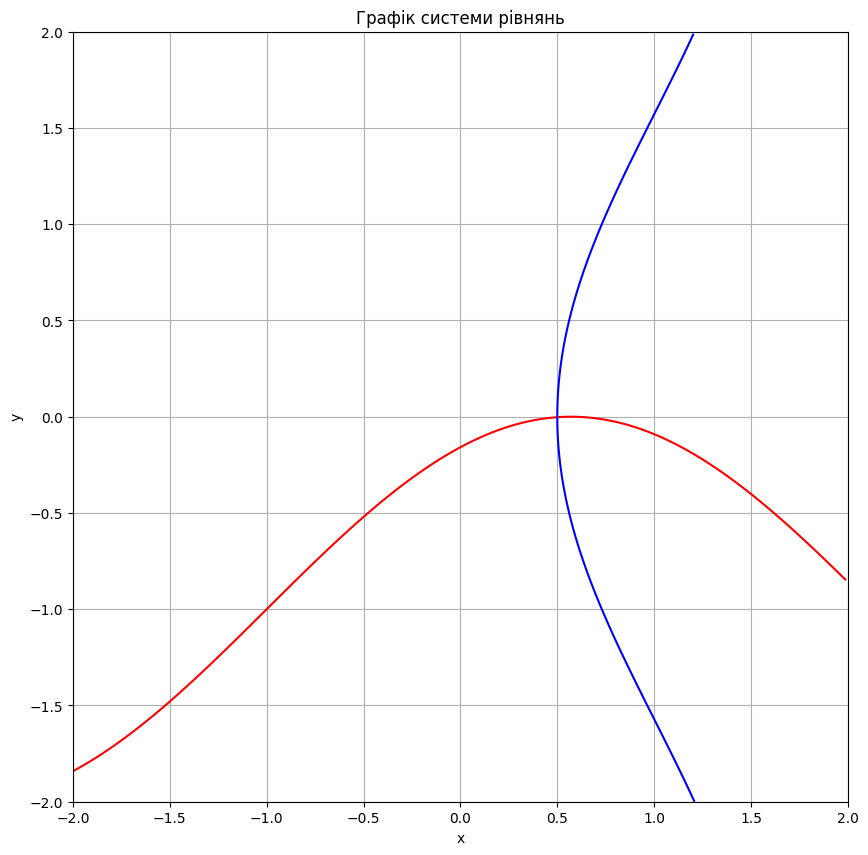

Simple iteration:
x= -1.0205700820779433 
y= 8.53758739260968e-08 
The amount of iteration =  5
Check: [ 0.50000157 -0.0025049 ]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import math

# область значень для x та y
x_min, x_max = -2, 2
y_min, y_max = -2, 2
step = 0.01

# створюємо масиви значень x та y
x, y = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

# рівняння системи
eq1 = np.sin(x + 1) - y - 1
eq2 = 2*x + np.cos(y) - 2

# створюємо графік
fig, ax = plt.subplots(figsize=(10, 10))

# додаємо графік першого рівняння
ax.contour(x, y, eq1, levels=[0], colors='red')

# додаємо графік другого рівняння
ax.contour(x, y, eq2, levels=[0], colors='blue')

# налаштування графіка
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Графік системи рівнянь')
plt.grid(True)

# показуємо графік
plt.show()

# Розв'язок системи рівнянь методом простої ітерації
def f1(y):
    return np.sin(y + 1) - y - 1

def f2(x):
    return 2*x + np.cos(x) - 2

def iter(x, y, e):
    xn = x
    yn = y
    xn1 = f2(x)
    yn1 = f1(y)
    n = 1
    while ((abs(xn1 - xn) >= e) & (abs(yn1 - yn) >= e)):
        xn = xn1
        yn = yn1
        xn1 = f2(yn)
        yn1 = f1(xn)
        n += 1
    print('Simple iteration:')
    print('x=', xn, '\ny=', yn, '\nThe amount of iteration = ', n)

x0 = 0.15
y0 = -2.1
delta = 0.1
iter(x0, y0, 0.0001)

# Перевірка розв'язку
def f3(x):
    return np.sin(x[0] + 1) - x[1] - 1, 2*x[0] + np.cos(x[1]) - 2

s = optimize.root(f3, [0., 0.], method='hybr')
print('Check:', s.x)